### MGT-502 Final Project
# 
## Exploratory Data Analysis (EDA)
__Nadège Baertschi & Zélia Décaillet__

_May 2025_

In [24]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# Github repository URL
repo_url = "https://raw.githubusercontent.com/baertsch/MGT-502-ML-Project/main/"

# Load datasets
interactions_df = pd.read_csv(repo_url + "kaggle_data/interactions_train.csv")
interactions_df.rename(columns={"u": "user_id"}, inplace=True)

# Orginal items csv with a lot of missing data
items_df = pd.read_csv(repo_url + "kaggle_data/items.csv")

# Display
display(interactions_df.head())
display(items_df.head())

,user_id,i,t
0,4456,8581,1.687541e+09
1,142,1964,1.679585e+09
2,362,3705,1.706872e+09
3,1809,11317,1.673533e+09
4,4384,1323,1.681402e+09


,Title,Author,ISBN Valid,Publisher,Subjects,i
0,Classification décimale universelle : édition ...,NaN,9782871303336; 2871303339,Ed du CEFAL,Classification décimale universelle; Indexatio...,0
1,Les interactions dans l'enseignement des langu...,"Cicurel, Francine, 1947-",9782278058327; 2278058320,Didier,didactique--langue étrangère - enseignement; d...,1
2,Histoire de vie et recherche biographique : pe...,NaN,2343190194; 9782343190198,L'Harmattan,Histoires de vie en sociologie; Sciences socia...,2
3,Ce livre devrait me permettre de résoudre le c...,"Mazas, Sylvain, 1980-",9782365350020; 236535002X; 9782365350488; 2365...,Vraoum!,Moyen-Orient; Bandes dessinées autobiographiqu...,3
4,Les années glorieuses : roman /,"Lemaitre, Pierre, 1951-",9782702180815; 2702180817; 9782702183618; 2702...,Calmann-Lévy,France--1945-1975; Roman historique; Roman fra...,4


In [26]:
items_df[items_df['i']==1323]

,Title,Author,ISBN Valid,Publisher,Subjects,i
1323,L'examen clinique de l'aîné : guide d'évaluati...,"Voyer, Philippe",9782761372022; 2761372026,Pearson,Nursing Care; Geriatrics; Health Services for ...,1323


## Let's explore the data provided by Kaggle

In [27]:
n_users = interactions_df["user_id"].nunique()
n_items = items_df['i'].nunique()
n_viewed_items = interactions_df["i"].nunique()
n_interactions = interactions_df.shape[0]
print(f"Number of interactions in the dataset: {n_interactions}")
print(f"Number of users in the dataset: {n_users}")
print(f"Number of items in the library: {n_items}")
print(f"Number of viewed items in the dataset: {n_viewed_items}")
print(f"Number of items in the library, which no user has interacted with: {n_items - n_viewed_items}")

Number of interactions in the dataset: 87047
Number of users in the dataset: 7838
Number of items in the library: 15291
Number of viewed items in the dataset: 15109
Number of items in the library, which no user has interacted with: 182


### Let's see how the number of interactions per user is distributed

In [30]:
import os

os.makedirs("plots", exist_ok=True)

Average number of interactions per user: 11.11
Minimum number of interactions per user: 3
Maximum number of interactions per user: 385
Median number of interactions per user: 6.00


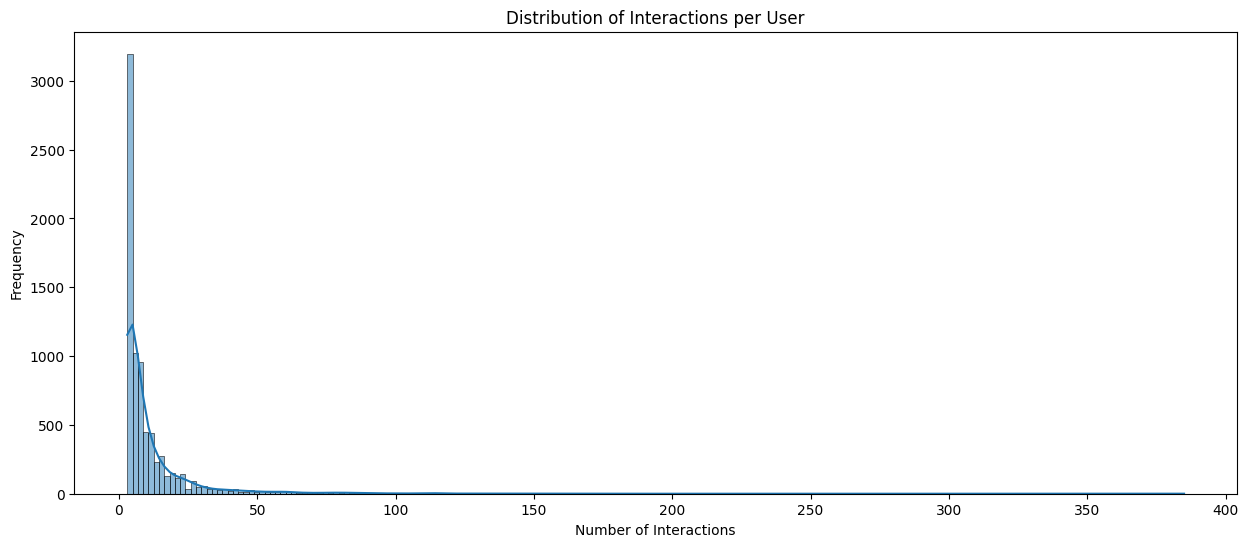

In [31]:
interactions_per_user = interactions_df.groupby('user_id').size()
print(f"Average number of interactions per user: {interactions_per_user.mean():.2f}")
print(f"Minimum number of interactions per user: {interactions_per_user.min()}")
print(f"Maximum number of interactions per user: {interactions_per_user.max()}")
print(f"Median number of interactions per user: {interactions_per_user.median():.2f}")
# Plot distribution of interactions per user
plt.figure(figsize=(15, 6))
sns.histplot(interactions_per_user, bins=200, kde=True)
plt.title('Distribution of Interactions per User')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.savefig("plots/interactions_per_user.png", dpi=300, bbox_inches='tight')

### What about the number of interactions per item?

/var/folders/3d/zlkn8h8d2yx5345bf7csn9bh0000gn/T/ipykernel_58367/3754619249.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  items_df['n_interactions'].fillna(0, inplace=True)


Average number of interactions per item: 5.69
Minimum number of interactions per item: 0.0
Maximum number of interactions per item: 380.0
Median number of interactions per item: 4.00


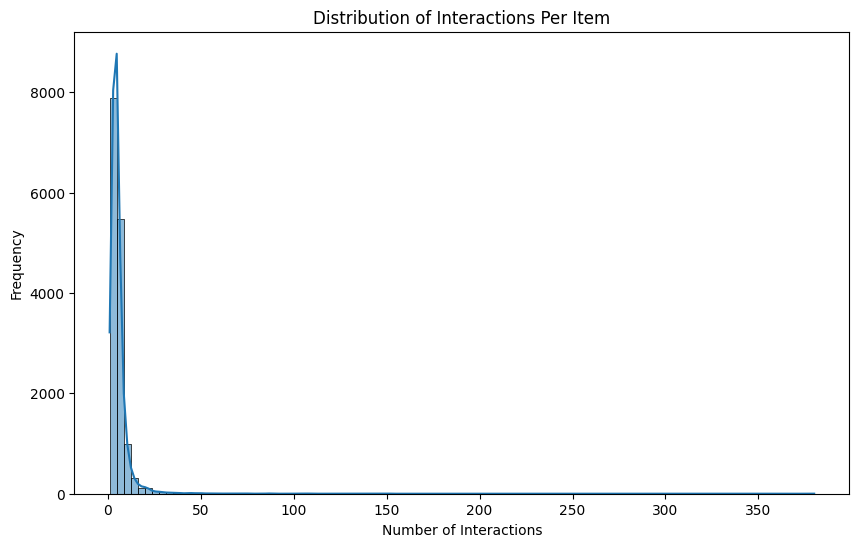

<Figure size 640x480 with 0 Axes>

In [34]:
interactions_per_item = interactions_df.groupby('i').size()
items_df=items_df.merge(interactions_per_item.rename('n_interactions'), on='i', how='left')
items_df['n_interactions'].fillna(0, inplace=True)
print(f"Average number of interactions per item: {items_df['n_interactions'].mean():.2f}")
print(f"Minimum number of interactions per item: {items_df['n_interactions'].min()}")
print(f"Maximum number of interactions per item: {items_df['n_interactions'].max()}")
print(f"Median number of interactions per item: {items_df['n_interactions'].median():.2f}")
plt.figure(figsize=(10, 6))
sns.histplot(interactions_per_item,bins=100, kde=True)
plt.title('Distribution of Interactions Per Item')
plt.xlabel('Number of Interactions')
plt.ylabel('Frequency')
plt.show()
plt.savefig("plots/interactions_per_item.png", dpi=300, bbox_inches='tight')

### What are the most popular books?

In [ ]:
pop_books = interactions_df.groupby('i').size().reset_index(name='count')
pop_books = pop_books.sort_values(by='count', ascending=False)

,i,count
11264,11366,380
3030,3055,357
10623,10715,305
8921,8999,257
601,611,217
4391,4426,189
53,53,178
2796,2820,177
13765,13885,151
14416,14555,151


In [16]:
pop_books_idx = pop_books.iloc[:10]['i'].values.tolist()
for _,i in enumerate(pop_books_idx):
    print(f"Top {_+1} book in our librabry:")
    print(items_df[items_df['i'] == i]['Title'].values[0])
    print(items_df[items_df['i'] == i]['Author'].values[0])
    print(items_df[items_df['i'] == i]['Subjects'].values[0])
    print('\n')
    

Top 1 book in our librabry:
Le Petit Robert : dictionnaire alphabétique et analogique de la langue française /
nan
"Petit Robert"; Français (langue); Dictionnaires français


Top 2 book in our librabry:
Demon slayer /
Gotōge, Koyoharu
Mangas


Top 3 book in our librabry:
Vagabond /
Inoué, Takehiko
Bandes dessinées; Mangas


Top 4 book in our librabry:
Spy x Family /
Endo, Tatsuya
Espionnage; Famille; Magie; Mangas; Shônen


Top 5 book in our librabry:
L'Arabe du futur /
Sattouf, Riad
Moyen-Orient--20e siècle; Bandes dessinées autobiographiques; Récits personnels; Bandes dessinées


Top 6 book in our librabry:
The Promised Neverland /
Shirai, Kaiu
Shônen; Mangas; Bandes dessinées


Top 7 book in our librabry:
Fullmetal alchemist /
Arakawa, Hiromu, 1973-
Shônen; Mangas; Bandes dessinées


Top 8 book in our librabry:
Soins infirmiers : médecine et chirurgie /
Brunner, Lillian Sholtis
soins infirmiers--[manuel]; Nursing Care; Perioperative Nursing; Soins infirmiers; Chirurgie; [Manuels d'e

In [17]:
items_df[items_df['i'].isin(pop_books_idx)]

,Title,Author,ISBN Valid,Publisher,Subjects,i,n_interactions
53,Fullmetal alchemist /,"Arakawa, Hiromu, 1973-",9782351420171; 2351420179; 9782351420188; 2351...,Kurokawa,Shônen; Mangas; Bandes dessinées,53,178.0
611,L'Arabe du futur /,"Sattouf, Riad",9782370730145; 2370730145; 9782370730541; 2370...,Allary éditions,Moyen-Orient--20e siècle; Bandes dessinées aut...,611,217.0
2820,Soins infirmiers : médecine et chirurgie /,"Brunner, Lillian Sholtis",9782804165567; 2804165566; 9782804165574; 2804...,De Boeck Université,soins infirmiers--[manuel]; Nursing Care; Peri...,2820,177.0
3055,Demon slayer /,"Gotōge, Koyoharu",9782809482317; 2809482314; 9782809482324; 2809...,Panini manga,Mangas,3055,357.0
4426,The Promised Neverland /,"Shirai, Kaiu",9782820342706; 2820342701; 9782820332233; 2820...,Kazé Manga,Shônen; Mangas; Bandes dessinées,4426,189.0
8999,Spy x Family /,"Endo, Tatsuya",9782380710243; 2380710244; 9782380710250; 2380...,Kurokawa,Espionnage; Famille; Magie; Mangas; Shônen,8999,257.0
10715,Vagabond /,"Inoué, Takehiko",9782845800670; 2845800673; 9782845801158; 2845...,Tonkam,Bandes dessinées; Mangas,10715,305.0
11366,Le Petit Robert : dictionnaire alphabétique et...,NaN,9782321008583; 232100858X,Le Robert,"""Petit Robert""; Français (langue); Dictionnair...",11366,380.0
13885,"Pons Kompaktwörterbuch : Französisch-Deutsch, ...",NaN,9783125173446; 3125173442,Pons,allemand (langue)--français (langue)--[diction...,13885,151.0
14555,Tokyo revengers /,"Wakui, Ken",9782344035290; 234403529X; 9782344035306; 2344...,Glénat,Mangas,14555,151.0


### Any missing info in the items dataframe?

In [13]:
items_df.isna().sum()

Title            0
Author        2653
ISBN Valid     723
Publisher       25
Subjects      2223
i                0
dtype: int64

### Who are the biggest authors?

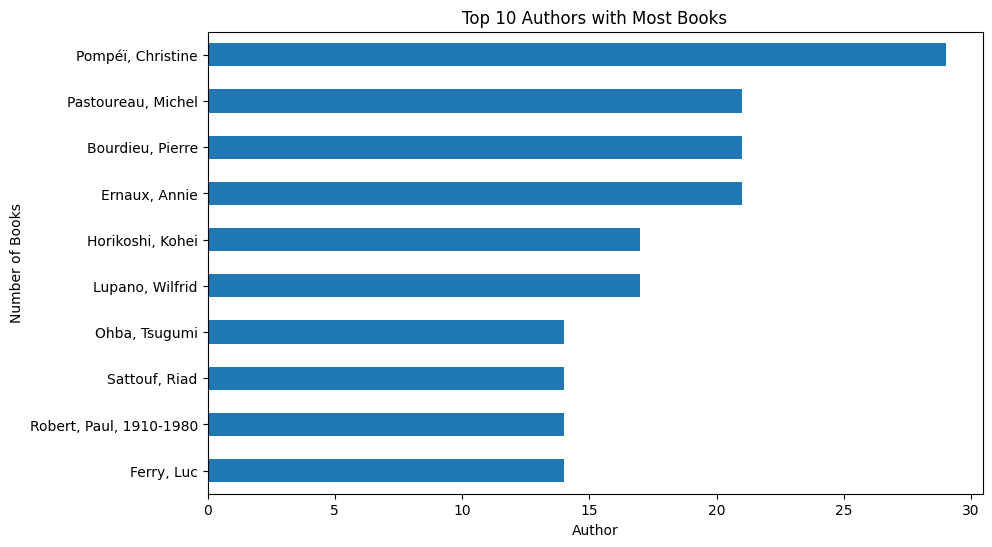

<Figure size 640x480 with 0 Axes>

In [35]:
author_counts = items_df['Author'].value_counts()
author_counts=author_counts.head(10)
author_counts = author_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
author_counts.plot(kind='barh')
plt.title('Top 10 Authors with Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.show()
plt.savefig("plots/top_10_authors.png", dpi=300, bbox_inches='tight')

In [20]:
author_counts

Author
Ferry, Luc                 14
Robert, Paul, 1910-1980    14
Sattouf, Riad              14
Ohba, Tsugumi              14
Lupano, Wilfrid            17
Horikoshi, Kohei           17
Ernaux, Annie              21
Bourdieu, Pierre           21
Pastoureau, Michel         21
Pompéï, Christine          29
Name: count, dtype: int64

### Most popular subjects?

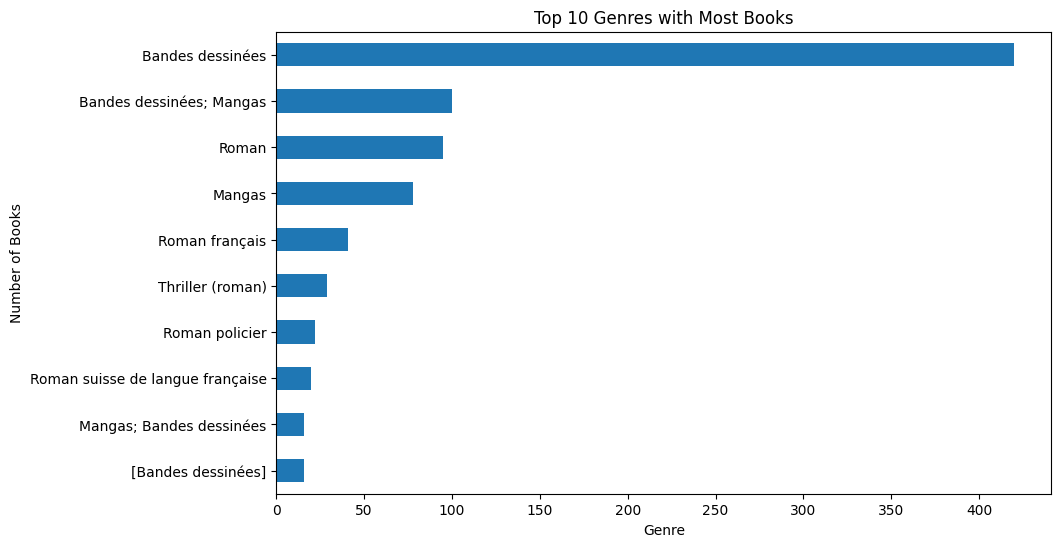

<Figure size 640x480 with 0 Axes>

In [36]:
genre_counts = items_df['Subjects'].value_counts()
top_genres = genre_counts.head(10)
top_genres = top_genres.sort_values(ascending=True)
plt.figure(figsize=(10, 6))
top_genres.plot(kind='barh')
plt.title('Top 10 Genres with Most Books')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.show()
plt.savefig("plots/top_10_genres.png", dpi=300, bbox_inches='tight')


In [22]:
top_genres

Subjects
[Bandes dessinées]                   16
Mangas; Bandes dessinées             16
Roman suisse de langue française     20
Roman policier                       22
Thriller (roman)                     29
Roman français                       41
Mangas                               78
Roman                                95
Bandes dessinées; Mangas            100
Bandes dessinées                    420
Name: count, dtype: int64

In [ ]:
def create_data_matrix1(data, n_users, n_items):
    """
    This function creates a data matrix with binary values for the interactions, 1 is interaction and 0 is no interaction.
    The data matrix is of shape (n_users, n_items). 
    """
    data_matrix = np.zeros((n_users, n_items))
    data_matrix[data['user_id'].values, data['i'].values] = 1
    return data_matrix

In [ ]:
def plot_heatmap1(data_matrix, last_row=50,last_column=50, title="Interaction Heatmap", label={'label':'Interaction (1 = Positive, 0 = None)'}
                  xlabel='Item ID', ylabel='User ID'):
    """
    This function plots a heatmap of a matrix.
    """
    matrix_subset = data_matrix[:last_row, :last_column]

    plt.figure(figsize=(10, 8))
    sns.heatmap(matrix_subset, cmap='YlGnBu', cbar=True,cbar_kws=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylbael)
    plt.show()